   person_age  person_income  person_home_ownership  person_emp_length  \
0          22          59000                      3              123.0   
1          21           9600                      2                5.0   
2          25           9600                      0                1.0   
3          23          65500                      3                4.0   
4          24          54400                      3                8.0   

   loan_intent  loan_grade  loan_amnt  loan_int_rate  loan_status  \
0            4           3      35000          16.02            1   
1            1           1       1000          11.14            0   
2            3           2       5500          12.87            1   
3            3           2      35000          15.23            1   
4            3           2      35000          14.27            1   

   loan_percent_income  cb_person_default_on_file  cb_person_cred_hist_length  \
0                 0.59                          1          

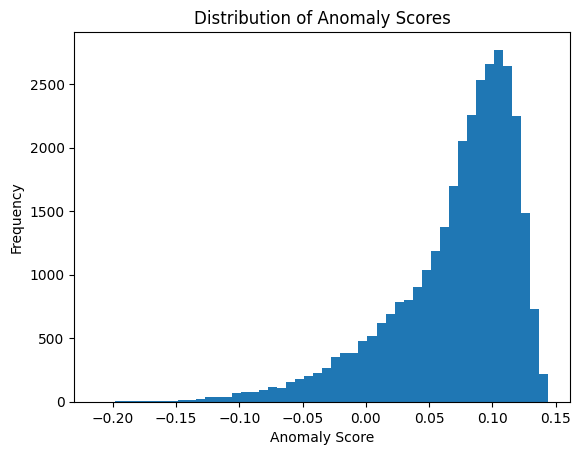

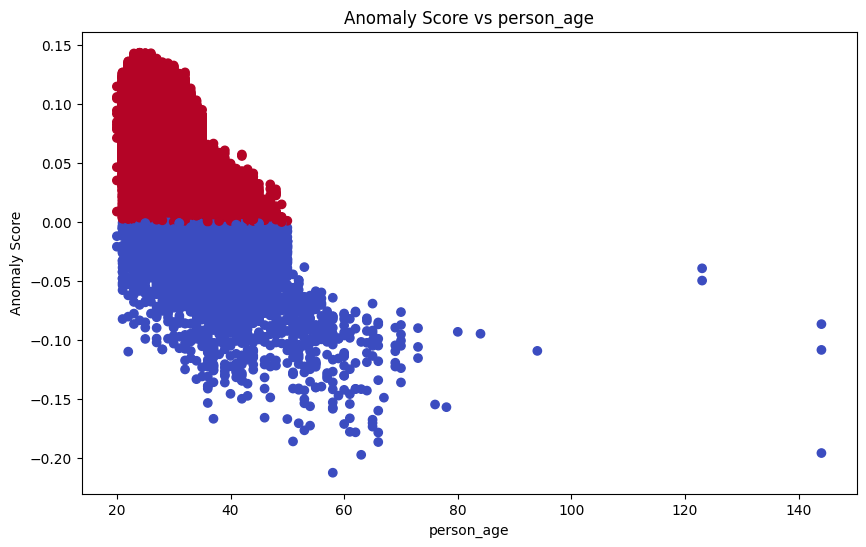

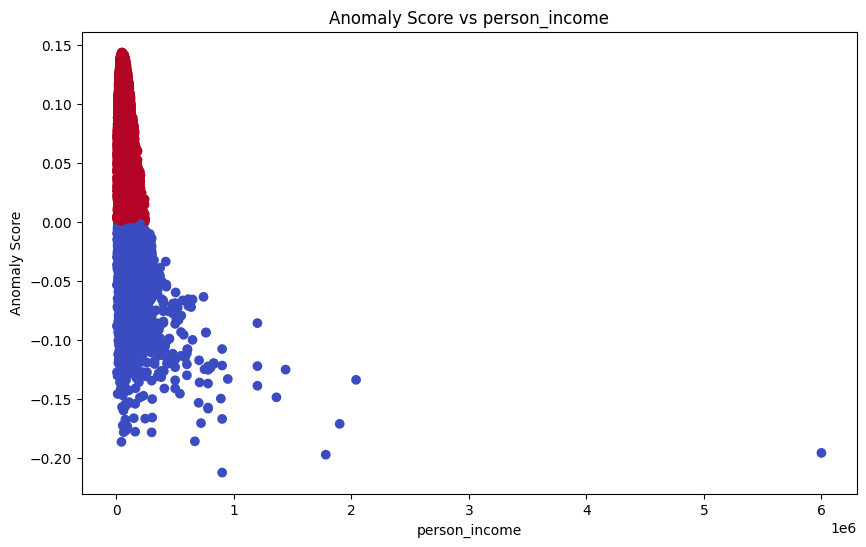

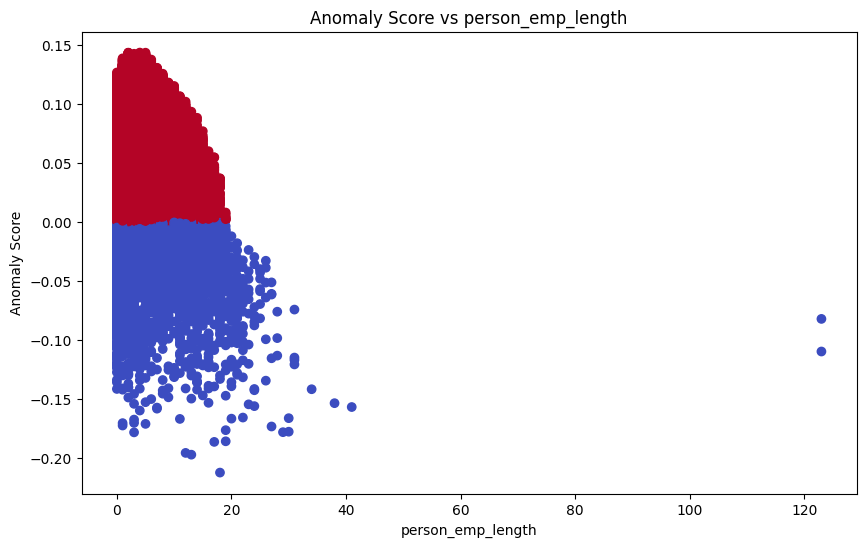

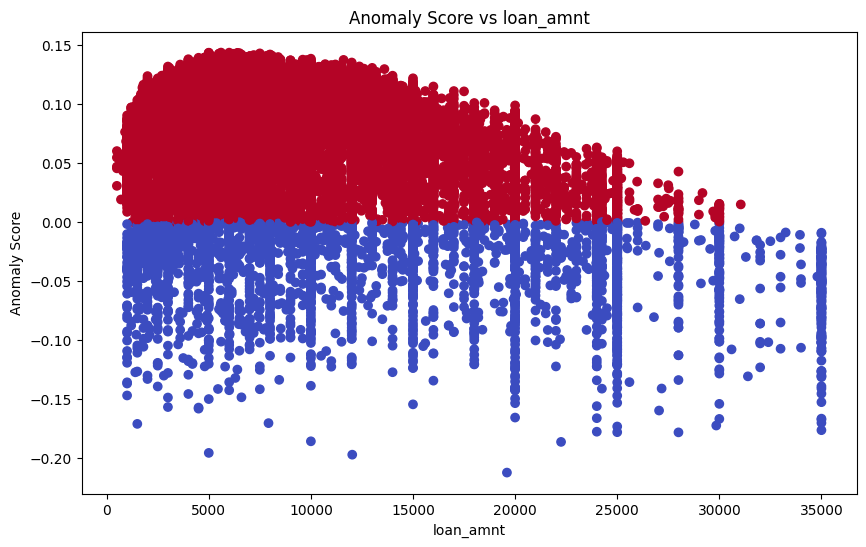

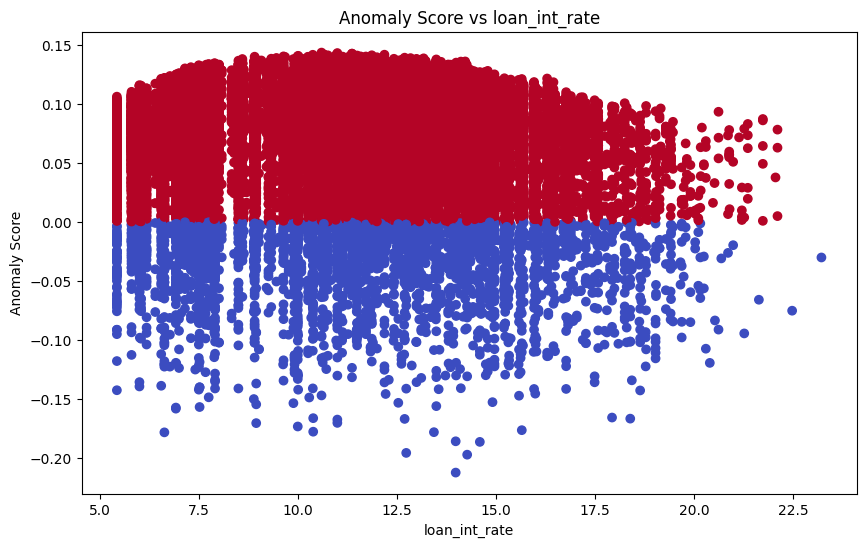

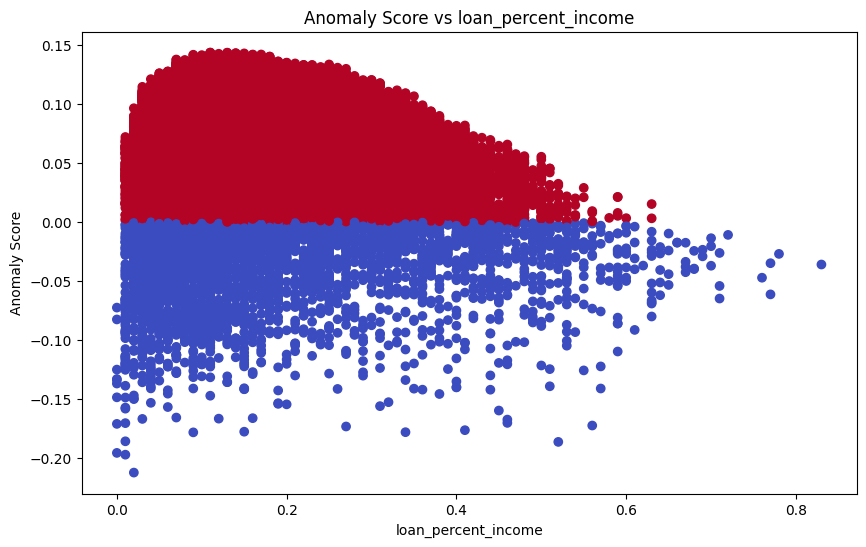

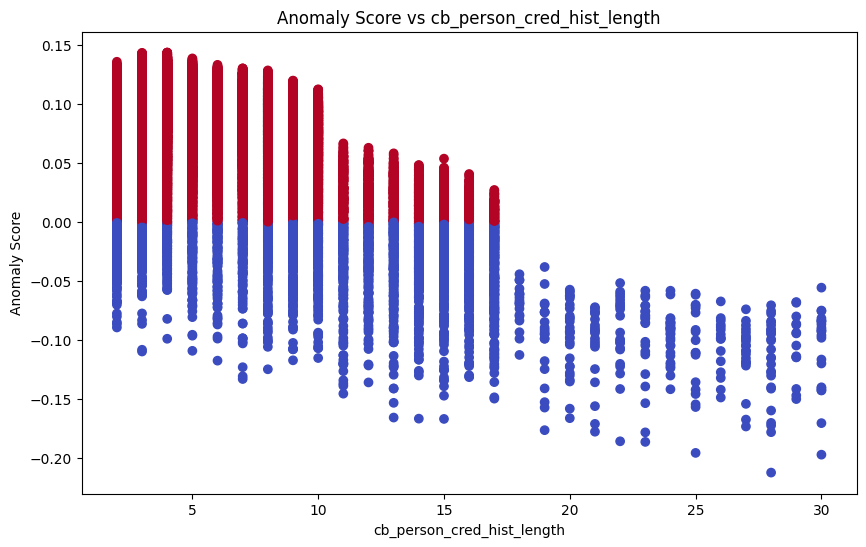

In [1]:
import pandas as pd
from sklearn.ensemble import IsolationForest
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt

# Read the dataset
df = pd.read_csv(r"C:\Users\risse\Downloads\E2_BigData\caso_base\dataset\credit_risk-dataset.csv")

# Preprocess categorical variables
categorical_cols = df.select_dtypes(include=['object']).columns
labels_encoders = {}
for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    labels_encoders[col] = le

# Select features for Isolation Forest
features = [
    "person_age", "person_income", "person_emp_length",
    "loan_amnt", "loan_int_rate", "loan_percent_income", "cb_person_cred_hist_length"
]

X = df[features]

# Train the Isolation Forest model
modelo = IsolationForest(n_estimators=100, contamination=0.1, random_state=42)
modelo.fit(X)

# Predict anomalies
df['anomalia_score'] = modelo.decision_function(X)
df['es_anomalia'] = modelo.predict(X)

# Identify anomalies (es_anomalia = -1)
anomalies = df[df['es_anomalia'] == -1]

# Display the first few rows with all columns
pd.set_option('display.max_columns', None)
print(df.head())

# Optional: Visualize anomaly scores
plt.hist(df['anomalia_score'], bins=50)
plt.title('Distribution of Anomaly Scores')
plt.xlabel('Anomaly Score')
plt.ylabel('Frequency')
plt.show()

# Optional: Check anomaly distribution per feature
for feature in features:
    plt.figure(figsize=(10, 6))
    plt.scatter(df[feature], df['anomalia_score'], c=df['es_anomalia'], cmap='coolwarm')
    plt.title(f'Anomaly Score vs {feature}')
    plt.xlabel(feature)
    plt.ylabel('Anomaly Score')
    plt.show()